# Data

In [1]:
from custom_dataset import *

/home/yizhou/miniconda3/envs/cliport/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at microsoft/resnet-18 were not used when initializing ResNetModel: ['classifier.1.weight', 'classifier.1.bias']
- This IS expected if you are initializing ResNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ResNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
batch_size = 12

In [3]:
train_dataset = HandleDataset4Cliport("/home/yizhou/Research/temp1/")
val_dataset = HandleDataset4Cliport("/home/yizhou/Research/temp1/", is_train = False)

100%|███████████████████████████████████████| 174/174 [00:00<00:00, 2053.32it/s]


In [4]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, shuffle=True, batch_size=batch_size, collate_fn=collate_fn)


In [5]:
# batch = next(iter(train_loader))
# x, y, l = batch 

# Model

In [6]:
from custom_cliport import *

In [7]:
model = CustomCliport()
model = model.cuda()

In [8]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [9]:
count_parameters(model)

9744433

In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [11]:
from tqdm.auto import tqdm

# Train

In [12]:
total_step = 0
best_val_loss = 1e6

In [13]:
for epoch in range(20):
    train_loss_list = []
    for batch in tqdm(train_loader):
        total_step += 1

        x, y, l = batch

        batch_size = x.size(0)
        pred_y = model(x, l)
        
        # reshape
        y = y.view(batch_size, -1)
        pred_y = pred_y.view(batch_size, -1)
        
        optimizer.zero_grad()
        loss = (-y * F.log_softmax(pred_y, -1)).sum()
        loss.backward()
        optimizer.step()
        
        train_loss_list.append(loss.item())

    print(epoch, "train loss: ", np.mean(train_loss_list))
    
    model.eval()
    val_loss_list = []
    for batch in tqdm(val_loader):
        total_step += 1

        x, y, l = batch

        batch_size = x.size(0)
        pred_y = model(x, l)
        
        # reshape
        y = y.view(batch_size, -1)
        pred_y = pred_y.view(batch_size, -1)
        
        loss = (-y * F.log_softmax(pred_y, -1)).sum()
        val_loss_list.append(loss.item())
    
    val_loss = np.mean(val_loss_list)
    print(epoch, "val loss: ", val_loss)
    
    # save model
    if val_loss < best_val_loss:
        model_path = '/home/yizhou/Research/temp0/custom_cliport824.pth'
        torch.save(model.state_dict(), model_path)
        best_val_loss = val_loss 
    
    

100%|█████████████████████████████████████████| 117/117 [00:15<00:00,  7.47it/s]


0 train loss:  19446.52038261218


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.58it/s]


0 val loss:  16469.01224662162


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.93it/s]


1 train loss:  17213.86630275107


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.56it/s]


1 val loss:  15677.155854096283


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.93it/s]


2 train loss:  16221.147527711004


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.58it/s]


2 val loss:  15397.046663851352


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.96it/s]


3 train loss:  15649.915097489316


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.81it/s]


3 val loss:  15061.639714421453


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  8.00it/s]


4 train loss:  15266.451697716346


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 16.00it/s]


4 val loss:  14936.437631967905


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.97it/s]


5 train loss:  14869.928560697115


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.71it/s]


5 val loss:  14992.102591849662


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.99it/s]


6 train loss:  14672.000095986912


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 16.36it/s]


6 val loss:  14823.8232421875


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  8.02it/s]


7 train loss:  14510.889331263355


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.55it/s]


7 val loss:  15444.087679476352


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  8.00it/s]


8 train loss:  14315.804453792734


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.53it/s]


8 val loss:  15598.381809543918


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.99it/s]


9 train loss:  14070.984700520834


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.70it/s]


9 val loss:  16713.029666385137


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.98it/s]


10 train loss:  14038.604721721422


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.82it/s]


10 val loss:  15360.268211570947


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.97it/s]


11 train loss:  13934.583491920406


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.66it/s]


11 val loss:  16660.603198902027


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.97it/s]


12 train loss:  13945.852555755877


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.32it/s]


12 val loss:  17049.631440033783


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.97it/s]


13 train loss:  13726.213671040332


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.37it/s]


13 val loss:  15543.933620143582


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.93it/s]


14 train loss:  13525.909960102832


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.89it/s]


14 val loss:  16193.490036423142


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.96it/s]


15 train loss:  13659.583976028312


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.34it/s]


15 val loss:  19143.52977195946


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  8.02it/s]


16 train loss:  13573.181219117254


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 16.01it/s]


16 val loss:  14865.441960515203


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.95it/s]


17 train loss:  13478.9283979367


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.72it/s]


17 val loss:  16936.27467799831


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.99it/s]


18 train loss:  13383.208162226229


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.60it/s]


18 val loss:  15872.617029138513


100%|█████████████████████████████████████████| 117/117 [00:14<00:00,  7.96it/s]


19 train loss:  13208.99055572249


100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.89it/s]

19 val loss:  15881.247255067568


# Test

In [ ]:
# model_path = '/home/yizhou/Research/temp0/custom_cliport823.pth'
model.load_state_dict(torch.load(model_path))

In [14]:
model.clip_text_feature_path = model.clip_text_feature_path.replace("json","pickle")

In [15]:
import pickle

In [16]:
text2clip_feature = pickle.load(open(model.clip_text_feature_path,'rb'))

In [17]:
text2clip_feature = {k: v.tolist() for k, v in text2clip_feature.items()}

In [18]:
# import json
# # the json file where the output must be stored
# out_file = open("text2clip_feature.json", "w")
  
# json.dump(text2clip_feature, out_file)

In [19]:
batch = next(iter(val_loader))

In [20]:
x, y, l = batch

In [21]:
x.shape, y.shape, l.shape

(torch.Size([12, 512, 7, 7]),
 torch.Size([12, 256, 256]),
 torch.Size([12, 512]))

In [22]:
pred_y = model(x, l)

In [23]:
pred_y = pred_y.view(pred_y.size(0), -1)

In [24]:
pred_y = F.softmax(pred_y, dim = -1)

In [25]:
pred_y = pred_y.view(-1, 256, 256)

In [26]:
import matplotlib.pyplot as plt

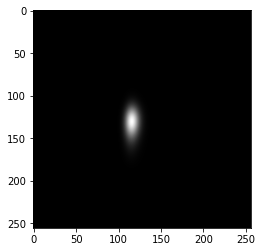

In [32]:
plt.imshow(np.array(pred_y[11].cpu().data) * 255, cmap = "gray")

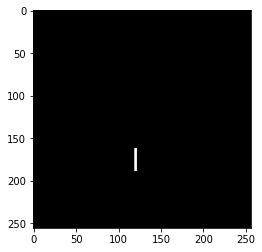

In [31]:
plt.imshow(np.array(y[11].cpu().data) * 255, cmap = "gray")

In [ ]:
torch.argmax(y[3].cpu().data).item() // 256, torch.argmax(y[3].cpu().data).item() % 256

In [ ]:
torch.argmax(pred_y[3].cpu().data).item() // 256, torch.argmax(pred_y[3].cpu().data).item() % 256

In [ ]:
pred_max_index = torch.argmax(pred_y[11].cpu().data).item() 

h, w =  pred_max_index// 256, pred_max_index % 256
print(h,w)

# get direction
top_bound = max(h - 5, 0)
bottom_bound = min(h + 5, 255)

left_bound = max(w - 5, 0)
right_bound = min(w + 5, 255)

# mean over vertical direction
v_mean = torch.mean(pred_y[0][top_bound:bottom_bound, w]).item()
h_mean = torch.mean(pred_y[0][left_bound:right_bound, h]).item()

handle_dir = "horizontal" if v_mean > h_mean else "vertical" # if vertical direction more concentrate, then direciton is horizontal

print(handle_dir)